In [19]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

from sklearn.decomposition import PCA

In [2]:
dataSet_hour = pd.read_csv("hour.csv", index_col = [0])
dataSet_day = pd.read_csv("day.csv", index_col = [0])

# Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
# - instant: record index
# - dteday : date
# - season : season (1:winter, 2:spring, 3:summer, 4:fall)
# - yr : year (0: 2011, 1:2012)
# - mnth : month ( 1 to 12)
# - hr : hour (0 to 23)
# - holiday : weather day is holiday or not (extracted from [Web Link])
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit :
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# - hum: Normalized humidity. The values are divided to 100 (max)
# - windspeed: Normalized wind speed. The values are divided to 67 (max)
# - casual: count of casual users
# - registered: count of registered users
# - cnt: count of total rental bikes including both casual and registered

In [3]:
display(dataSet_day.head(5))
display(dataSet_hour.head(5))

display(dataSet_hour.info())
display(dataSet_hour.describe())

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


None

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### From initial analysis:
1. Our target variable is going to be cnt (the count of bike in use)
2. cnt = casual + registered => will need to drop casual and registered to predict cnt
3. weekday, holiday and working day will have corelation since they might be related to each other - i.e. Saturday and Sunday won't be a working day 
4. temp and atemp might also have corelation
5. yr mnth may be dropped

## EDAV and CleanUp

In [4]:
dataSet = dataSet_hour.copy()

In [5]:
display(dataSet.head())

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


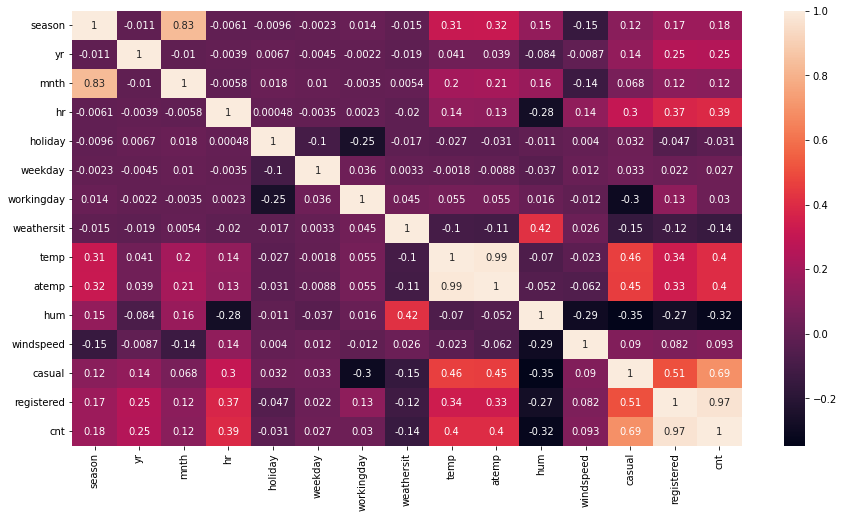

In [6]:
plt.figure(figsize = (15,8))
corr_matrix = sns.heatmap(dataSet.corr(), annot = True)

In [7]:
dataSet = dataSet.drop(axis = 1, columns = ['atemp', 'registered', 'mnth']) # Corr > 0.8
dataSet.head()

,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
instant,,,,,,,,,,,,,
1,2011-01-01,1,0,0,0,6,0,1,0.24,0.81,0.0,3,16
2,2011-01-01,1,0,1,0,6,0,1,0.22,0.80,0.0,8,40
3,2011-01-01,1,0,2,0,6,0,1,0.22,0.80,0.0,5,32
4,2011-01-01,1,0,3,0,6,0,1,0.24,0.75,0.0,3,13
5,2011-01-01,1,0,4,0,6,0,1,0.24,0.75,0.0,0,1


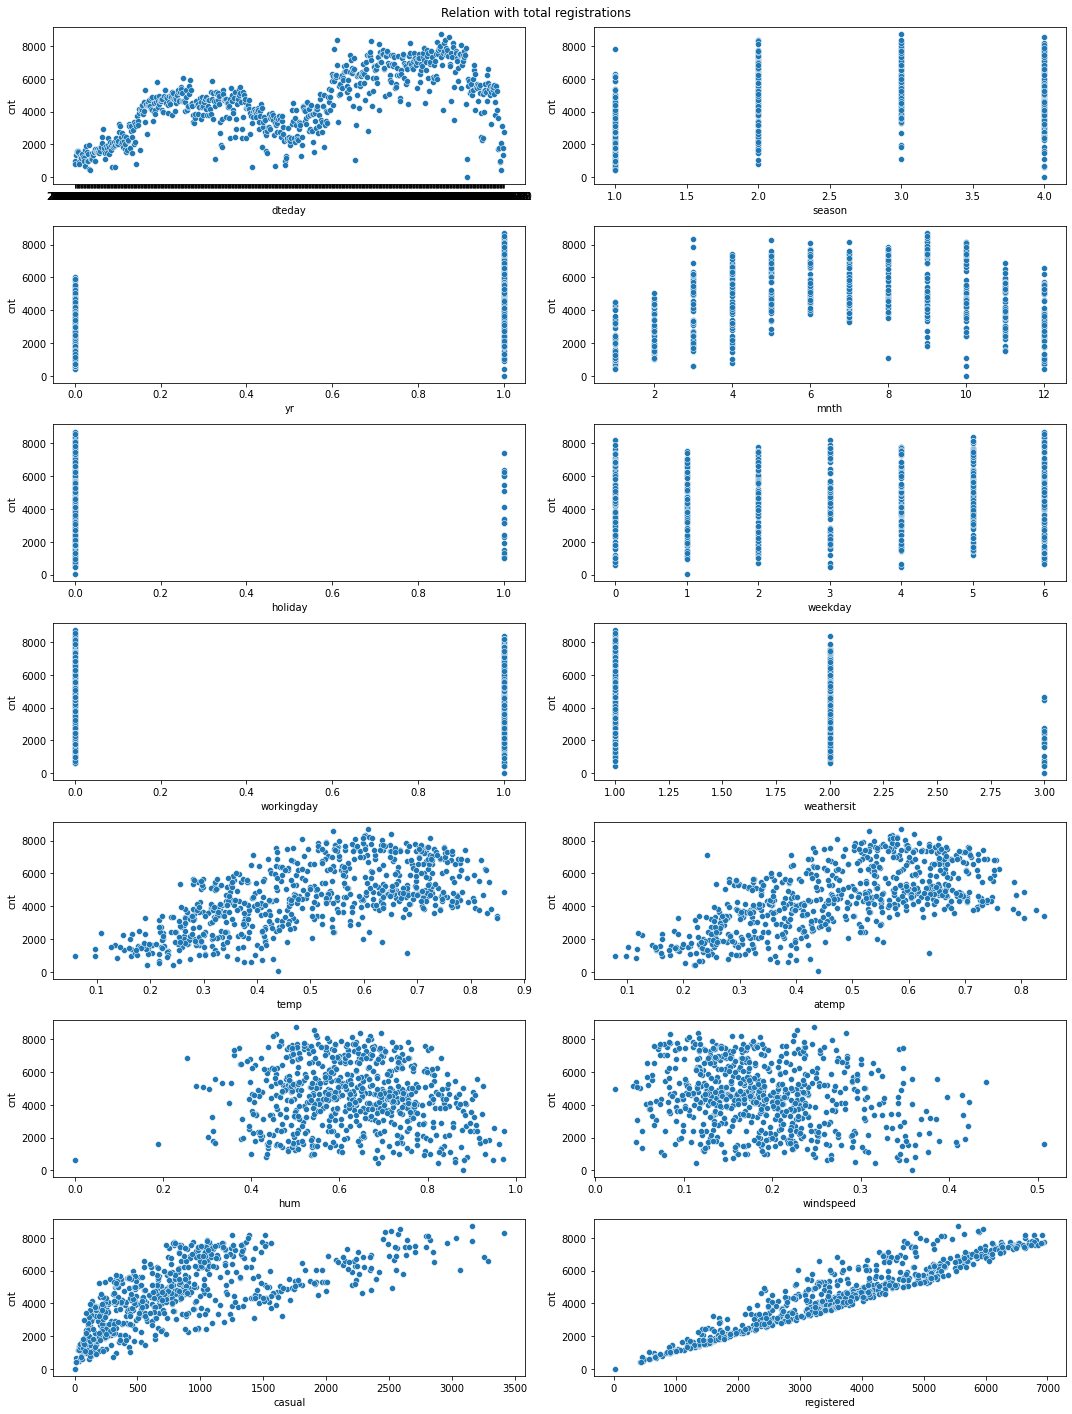

In [8]:
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

fig.suptitle('Relation with total registrations\n')
cols = dataSet_day.columns

count_loop = 0 
for i in range(0,7):
    for j in range(0,2): 
        sns.scatterplot(ax=axes[i, j], data=dataSet_day, x=cols[count_loop], y='cnt')
        count_loop += 1

plt.tight_layout()

#### Plotting to see growth over the 2 years data

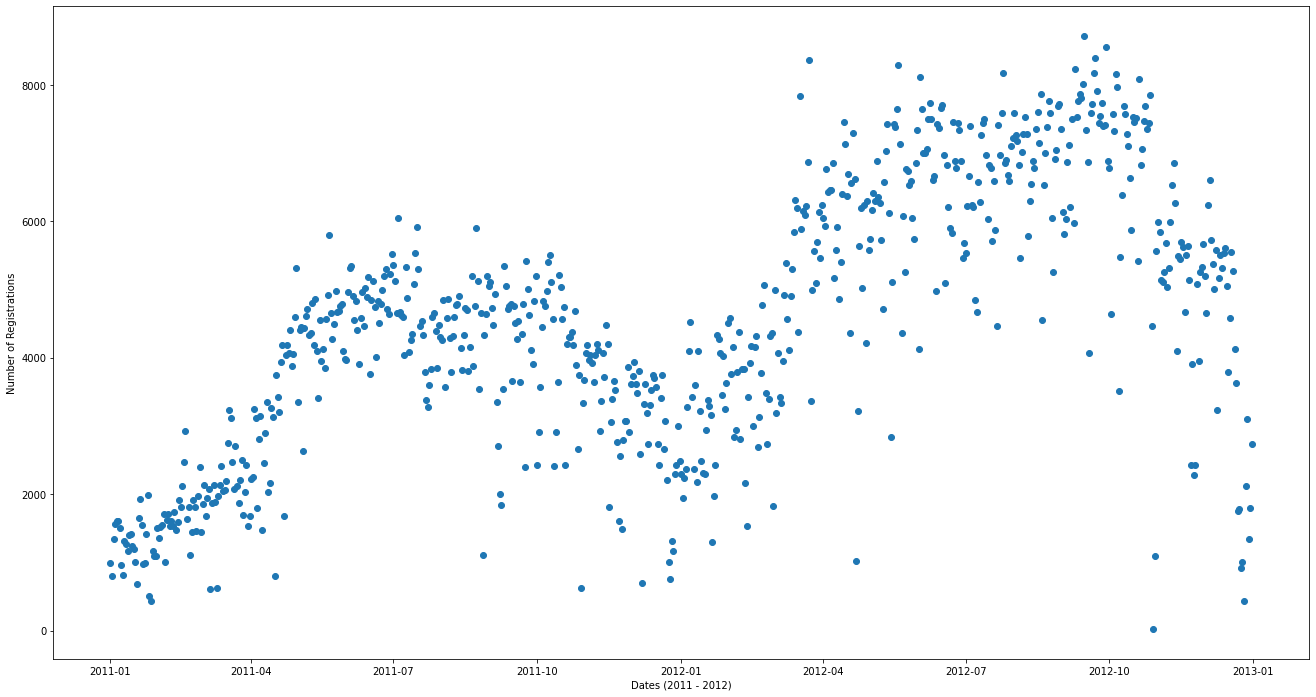

In [9]:
date, count = dataSet_day['dteday'].copy(), dataSet_day['cnt'].copy()

date = pd.to_datetime(date, infer_datetime_format= True)

plt.figure(figsize = (22.5, 12))
plt.ylabel("Number of Registrations")
plt.xlabel("Dates (2011 - 2012)")
plt.scatter(date,count)
plt.show()

#### Confirming no outliers using a z-score threshold of 2.33 (99%) 

In [10]:
# Z score
z = np.abs(stats.zscore(count))

threshold = 2.33
# Position of the outlier
print(np.where(z > threshold))

(array([], dtype=int64),)


#### Converting dates to ordinal weeks as there may be a trend with the week number (1 vs 10 vs 25 vs 50) and number of registrations

In [11]:
dataSet['date'] = pd.to_datetime(dataSet['dteday'], infer_datetime_format= True)
dataSet['date'] = [i.isocalendar().week for i in dataSet['date']]

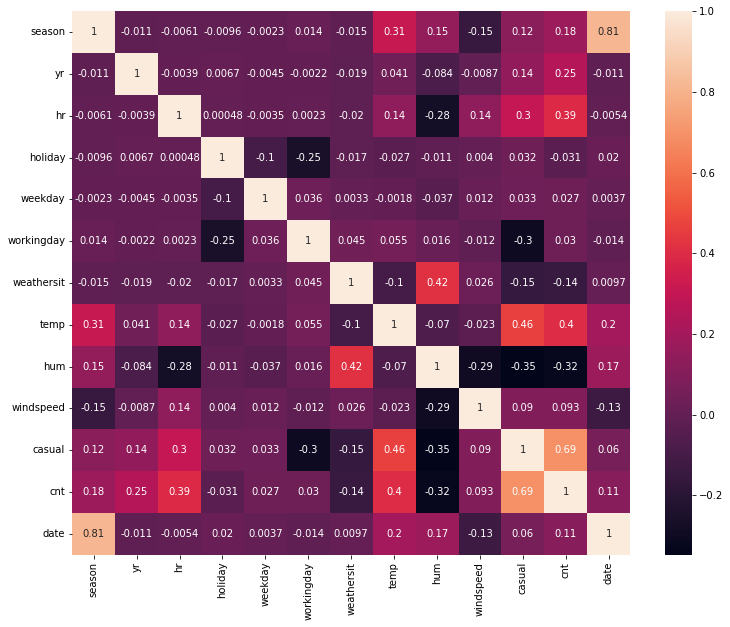

In [12]:
plt.figure(figsize = (12.5, 10))
sns.heatmap(dataSet.corr(),annot= True)
plt.show()

In [13]:
dataSet.describe()

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,date
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.627229,0.190098,35.676218,189.463088,26.601933
std,1.106918,0.500008,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.192930,0.122340,49.305030,181.387599,15.017005
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,4.000000,40.000000,14.000000
50%,3.000000,1.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,17.000000,142.000000,27.000000
75%,3.000000,1.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,48.000000,281.000000,40.000000
max,4.000000,1.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,367.000000,977.000000,52.000000


## Models

In [14]:
try: 
    y = dataSet.pop('cnt')
except:
    print("already popped")

display(y.head())
display(dataSet.head())

instant
1    16
2    40
3    32
4    13
5     1
Name: cnt, dtype: int64

,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,date
instant,,,,,,,,,,,,,
1,2011-01-01,1,0,0,0,6,0,1,0.24,0.81,0.0,3,52
2,2011-01-01,1,0,1,0,6,0,1,0.22,0.80,0.0,8,52
3,2011-01-01,1,0,2,0,6,0,1,0.22,0.80,0.0,5,52
4,2011-01-01,1,0,3,0,6,0,1,0.24,0.75,0.0,3,52
5,2011-01-01,1,0,4,0,6,0,1,0.24,0.75,0.0,0,52


In [15]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataSet, y, test_size=0.15, random_state=42)

#### Sk Learn Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
regr = LinearRegression()

try: 
    dates = X_train.pop('dteday')
    dates_test = X_test.pop('dteday')
except:
    print("Popped")

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
print(regr.coef_)

# Calculate adjusted R 

print(regr.score(X_train, y_train)) 

Popped
0.6057294200108405
[ 15.78409958  57.67669345   4.83574846   5.68996717  -0.19417302
  87.59263401  -7.53147494  27.06725364 -35.7009316   26.53441294
   2.35613035   0.12396392]
0.6106573162368027


#### Stats model OLS regression

In [18]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              5327.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                        0.00
Time:                        14:01:32   Log-Likelihood:                         -90926.
No. Observations:               14772   AIC:                                  1.819e+05
Df Residuals:                   14760   BIC:                                  1.820e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Understanding linear regressions assumptions

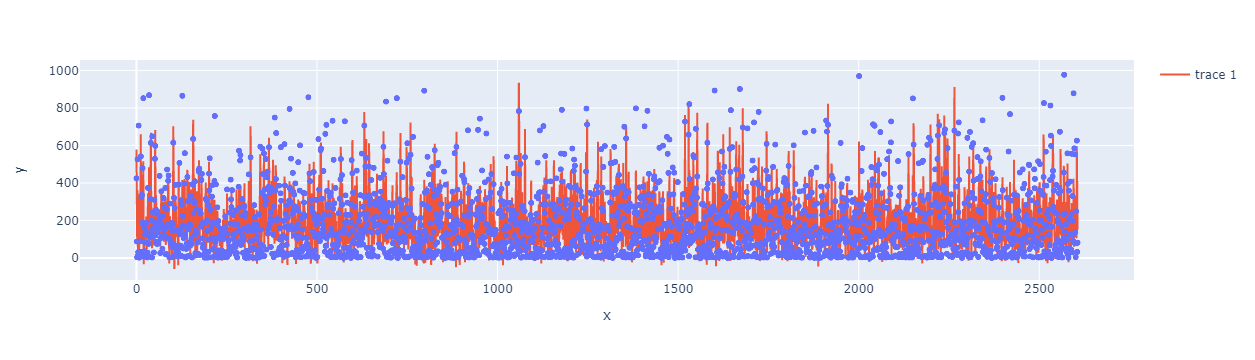

Mean =  1.00700423298891e-17
St_Dev =  1.0


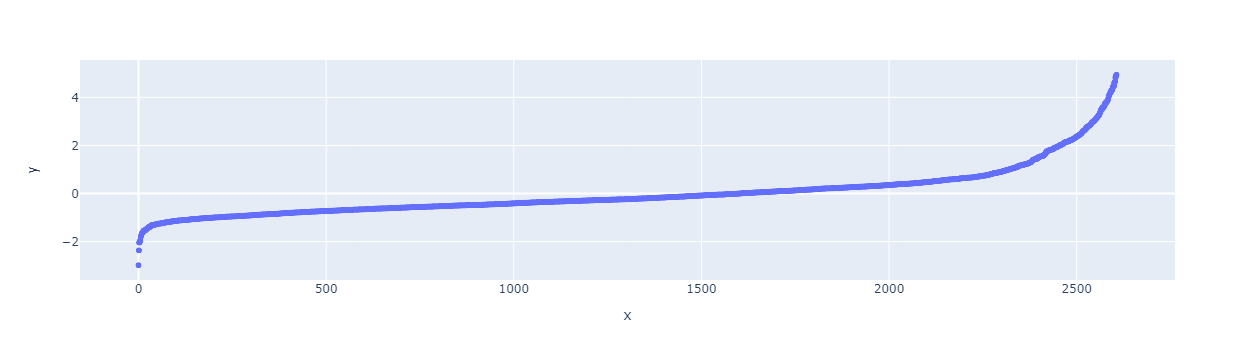

In [61]:
# Checking for normal distributions of error terms
import plotly.express as px
import statistics

def standardize(errors):
    mean = statistics.mean(errors)
    st_dev = statistics.stdev(errors)
    
    # Z score
    normalized = [ (i - mean)/st_dev for i in errors]
    print("Mean = ", statistics.mean(normalized)) # CLose to 0
    print("St_Dev = ", statistics.stdev(normalized)) # equal to 1
    return sorted(normalized)

y_pred = est2.predict(X_test)

fig = px.scatter(y = y_test, x = [i for i in range(len(X_test))])
fig.add_scatter(y = y_pred, x = [i for i in range(len(X_test))])
fig.show()

errors =  y_test - y_pred
fig = px.scatter( y = standardize(errors), x = [i for i in range(len(X_test))])
fig.show()

### PCA on variables

In [35]:
pca = PCA()

pca.fit(X_train)

print(pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_,columns=X_train.columns))

[8.99024719e-01 8.30068973e-02 1.59900549e-02 1.48389431e-03
 1.53111489e-04 1.46947147e-04 9.06363698e-05 7.08448489e-05
 1.04843642e-05 9.59405264e-06 8.39332775e-06 4.42303228e-06]
      season        yr        hr   holiday   weekday  workingday  weathersit  \
0   0.002800  0.001470  0.042607  0.000094  0.001236   -0.002852   -0.002002   
1  -0.059625  0.000579  0.012358 -0.000246 -0.001077   -0.000044   -0.000791   
2   0.003550  0.004024 -0.998948  0.000234  0.003904   -0.007212   -0.002479   
3   0.003211  0.002806 -0.003728  0.008619 -0.999867   -0.011565   -0.003280   
4  -0.852183  0.019480 -0.003695  0.016171 -0.002849   -0.109790    0.501839   
5   0.498957 -0.014210  0.000194 -0.012212 -0.001613    0.053358    0.856373   
6   0.003421 -0.975823 -0.002168  0.018218  0.000017   -0.216162   -0.007394   
7   0.130272  0.215975  0.008474  0.105204  0.012954   -0.957395   -0.012819   
8   0.056768 -0.019900 -0.004639  0.085175 -0.003245    0.038417    0.082616   
9  -0.007501 -0.

Mean =  1.00700423298891e-17
St_Dev =  1.0


c:\users\jasmeet singh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



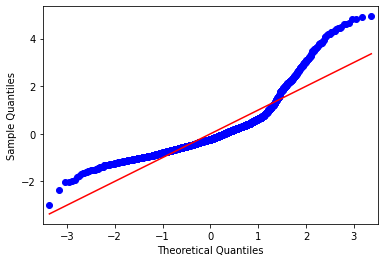

In [65]:

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

errors =  y_test - y_pred
data = standardize(errors)
                                  
# q-q plot
qqplot(np.asarray(data), line='s')
pyplot.show()

In [66]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

errors =  y_test - y_pred
data = standardize(errors)
                                  
# q-q plot
data = np.asarray(data)
       
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Mean =  1.00700423298891e-17
St_Dev =  1.0
Statistics=0.848, p=0.000
Sample does not look Gaussian (reject H0)
